<a href="https://colab.research.google.com/github/MonteiroAlexandre/A.I.-Researcher-Selection/blob/main/electric_Lines_Patterns.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving database.zip to database.zip


In [ ]:
!unzip database.zip

Archive:  database.zip
replace database.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: database.csv            


# Carregando o dataset:

In [ ]:
import pandas as pd
df = pd.read_csv('database.csv', usecols=[*range(0, 20000), *range(400000, 420000), *range(780000, 800003)])
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,799963,799964,799965,799966,799967,799968,799969,799970,799971,799972,799973,799974,799975,799976,799977,799978,799979,799980,799981,799982,799983,799984,799985,799986,799987,799988,799989,799990,799991,799992,799993,799994,799995,799996,799997,799998,799999,signal_id,phase,target
0,18,18,17,18,18,18,19,18,18,17,18,18,18,18,18,17,17,18,18,18,19,17,17,18,18,18,18,18,18,17,17,18,17,17,17,17,17,17,17,17,...,18,19,17,18,18,18,19,17,17,17,16,18,18,18,19,18,17,17,17,18,17,17,18,17,18,19,19,18,18,17,17,18,19,19,17,19,17,0,0,0
1,1,0,-1,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,-1,0,0,0,0,-1,-1,-1,0,0,0,...,1,1,0,1,0,0,1,0,0,0,-1,0,0,0,2,0,0,0,0,1,0,0,1,-1,0,1,1,1,0,0,0,0,2,1,0,1,0,1,1,0
2,-19,-19,-20,-19,-19,-20,-18,-19,-20,-19,-19,-19,-19,-19,-18,-20,-19,-19,-19,-18,-19,-20,-19,-20,-19,-18,-19,-19,-19,-20,-19,-18,-20,-19,-21,-20,-20,-19,-19,-20,...,-19,-19,-18,-19,-19,-18,-19,-20,-20,-19,-20,-20,-19,-19,-18,-20,-20,-20,-20,-18,-20,-19,-19,-20,-19,-18,-18,-19,-20,-21,-18,-19,-18,-19,-19,-18,-19,2,2,0
3,-16,-17,-17,-16,-16,-15,-16,-17,-18,-17,-16,-16,-16,-16,-16,-16,-16,-15,-14,-14,-15,-16,-17,-17,-16,-16,-16,-16,-17,-17,-17,-16,-17,-17,-18,-19,-18,-18,-16,-15,...,-15,-15,-14,-15,-16,-15,-15,-15,-14,-15,-15,-15,-16,-15,-14,-14,-16,-15,-16,-16,-16,-15,-16,-15,-16,-17,-16,-15,-15,-15,-15,-15,-15,-15,-15,-14,-14,3,0,1
4,-5,-6,-6,-5,-5,-4,-5,-7,-7,-7,-4,-5,-4,-5,-5,-5,-4,-4,-3,-4,-4,-5,-6,-5,-5,-4,-5,-5,-6,-5,-5,-5,-6,-6,-7,-7,-7,-6,-5,-4,...,-5,-4,-4,-4,-5,-5,-4,-4,-4,-4,-4,-4,-5,-5,-4,-4,-5,-5,-5,-5,-5,-5,-5,-5,-5,-6,-5,-4,-4,-4,-5,-4,-4,-4,-4,-3,-4,4,1,1


# Analisando a Estrutura dos dados:

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 501 entries, 0 to 500
Columns: 60003 entries, 0 to target
dtypes: int64(60003)
memory usage: 229.4 MB


In [ ]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,799963,799964,799965,799966,799967,799968,799969,799970,799971,799972,799973,799974,799975,799976,799977,799978,799979,799980,799981,799982,799983,799984,799985,799986,799987,799988,799989,799990,799991,799992,799993,799994,799995,799996,799997,799998,799999,signal_id,phase,target
count,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,...,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.00000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000
mean,-0.598802,-0.556886,-0.758483,-0.730539,-0.678643,-0.698603,-0.682635,-0.678643,-0.640719,-0.616766,-0.658683,-0.602794,-0.556886,-0.556886,-0.602794,-0.784431,-0.620758,-0.614770,-0.704591,-0.692615,-0.744511,-0.570858,-0.676647,-0.806387,-0.616766,-0.662675,-0.710579,-0.712575,-0.764471,-0.732535,-0.726547,-0.872255,-0.736527,-0.708583,-0.730539,-0.808383,-0.856287,-0.672655,-0.740519,-0.720559,...,-0.730539,-0.802395,-0.614770,-0.692615,-0.662675,-0.632735,-0.798403,-0.632735,-0.798403,-0.728543,-0.616766,-0.712575,-0.580838,-0.706587,-0.694611,-0.636727,-0.774451,-0.694611,-0.560878,-0.526946,-0.502994,-0.632735,-0.610778,-0.489022,-0.604790,-0.447106,-0.608782,-0.632735,-0.580838,-0.702595,-0.457086,-0.443114,-0.48503,-0.489022,-0.630739,-0.560878,-0.506986,250.000000,1.000000,0.069860
std,14.355790,14.378430,14.351709,14.369873,14.374370,14.389822,14.382388,14.350280,14.388282,14.367771,14.373770,14.383877,14.373004,14.347936,14.353812,14.396160,14.401940,14.417396,14.386958,14.340060,14.423404,14.389770,14.432575,14.366504,14.420293,14.397499,14.389373,14.401015,14.372349,14.423048,14.432986,14.343488,14.406611,14.396489,14.426269,14.409830,14.384829,14.454364,14.433868,14.357777,...,14.418504,14.425910,14.418922,14.401157,14.391942,14.357884,14.444974,14.432631,14.408375,14.420755,14.368188,14.436524,14.423867,14.357010,14.454499,14.379283,14.427995,14.415289,14.401069,14.421434,14.440169,14.395445,14.448606,14.391608,14.490393,14.399989,14.391478,14.478841,14.369271,14.461444,14.379174,14.398030,14.42880,14.406192,14.432234,14.422856,14.386051,144.770508,0.817313,0.255166
min,-26.000000,-29.000000,-25.000000,-27.000000,-26.000000,-26.000000,-27.000000,-27.000000,-26.000000,-25.000000,-25.000000,-25.000000,-27.000000,-27.000000,-27.000000,-25.000000,-25.000000,-27.000000,-27.000000,-27.000000,-25.000000,-26.000000,-26.000000,-25.000000,-27.000000,-25.000000,-26.000000,-25.000000,-26.000000,-26.000000,-26.000000,-27.000000,-26.000000,-26.000000,-28.000000,-29.000000,-26.000000,-27.000000,-26.000000,-29.000000,...,-28.000000,-29.000000,-26.000000,-26.000000,-26.000000,-25.000000,-29.000000,-25.000000,-27.000000,-26.000000,-26.000000,-27.000000,-25.000000,-25.000000,-26.000000,-25.000000,-27.000000,-27.000000,-26.000000,-28.000000,-24.000000,-25.000000,-28.000000,-25.000000,-27.000000,-24.000000,-24.000000,-26.000000,-25.000000,-26.000000,-25.000000,-27.000000,-27.00000,-25.000000,-26.000000,-28.000000,-26.000000,0.000000,0.000000,0.000000
25%,-15.000000,-15.000000,-15.000000,-15.000000,-14.000000,-15.000000,-15.000000,-15.000000,-15.000000,-15.000000,-14.000000,-15.000000,-14.000000,-14.000000,-14.000000,-14.000000,-15.000000,-14.000000,-14.000000,-15.000

Class Not Occur: 466
Class Occur: 35


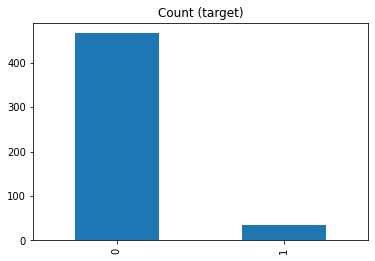

In [ ]:
target_count = df.target.value_counts()
print('Class Not Occur:', target_count[0])
print('Class Occur:', target_count[1])

target_count.plot(kind='bar', title='Count (target)');

# Preparação do Dataset:

In [ ]:
new_df = df.copy()

In [ ]:
labels = ['not occur', 'occur']
new_df['Desc. Parciais'] = pd.cut(df['target'], bins=2, labels=labels)

In [ ]:
new_df = new_df.drop(columns=['signal_id', 'phase'])
new_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,799962,799963,799964,799965,799966,799967,799968,799969,799970,799971,799972,799973,799974,799975,799976,799977,799978,799979,799980,799981,799982,799983,799984,799985,799986,799987,799988,799989,799990,799991,799992,799993,799994,799995,799996,799997,799998,799999,target,Desc. Parciais
0,18,18,17,18,18,18,19,18,18,17,18,18,18,18,18,17,17,18,18,18,19,17,17,18,18,18,18,18,18,17,17,18,17,17,17,17,17,17,17,17,...,17,18,19,17,18,18,18,19,17,17,17,16,18,18,18,19,18,17,17,17,18,17,17,18,17,18,19,19,18,18,17,17,18,19,19,17,19,17,0,not occur
1,1,0,-1,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,-1,0,0,0,0,-1,-1,-1,0,0,0,...,0,1,1,0,1,0,0,1,0,0,0,-1,0,0,0,2,0,0,0,0,1,0,0,1,-1,0,1,1,1,0,0,0,0,2,1,0,1,0,0,not occur
2,-19,-19,-20,-19,-19,-20,-18,-19,-20,-19,-19,-19,-19,-19,-18,-20,-19,-19,-19,-18,-19,-20,-19,-20,-19,-18,-19,-19,-19,-20,-19,-18,-20,-19,-21,-20,-20,-19,-19,-20,...,-19,-19,-19,-18,-19,-19,-18,-19,-20,-20,-19,-20,-20,-19,-19,-18,-20,-20,-20,-20,-18,-20,-19,-19,-20,-19,-18,-18,-19,-20,-21,-18,-19,-18,-19,-19,-18,-19,0,not occur
3,-16,-17,-17,-16,-16,-15,-16,-17,-18,-17,-16,-16,-16,-16,-16,-16,-16,-15,-14,-14,-15,-16,-17,-17,-16,-16,-16,-16,-17,-17,-17,-16,-17,-17,-18,-19,-18,-18,-16,-15,...,-16,-15,-15,-14,-15,-16,-15,-15,-15,-14,-15,-15,-15,-16,-15,-14,-14,-16,-15,-16,-16,-16,-15,-16,-15,-16,-17,-16,-15,-15,-15,-15,-15,-15,-15,-15,-14,-14,1,occur
4,-5,-6,-6,-5,-5,-4,-5,-7,-7,-7,-4,-5,-4,-5,-5,-5,-4,-4,-3,-4,-4,-5,-6,-5,-5,-4,-5,-5,-6,-5,-5,-5,-6,-6,-7,-7,-7,-6,-5,-4,...,-5,-5,-4,-4,-4,-5,-5,-4,-4,-4,-4,-4,-4,-5,-5,-4,-4,-5,-5,-5,-5,-5,-5,-5,-5,-5,-6,-5,-4,-4,-4,-5,-4,-4,-4,-4,-3,-4,1,occur
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
496,9,13,8,10,10,8,12,10,11,13,9,13,11,9,12,7,10,10,8,13,10,10,14,10,13,11,9,12,8,10,10,8,12,10,10,13,9,12,11,9,...,12,12,12,11,14,12,12,13,12,14,12,12,13,12,13,12,12,13,13,12,13,12,13,12,12,14,12,13,12,13,14,12,12,13,13,13,13,11,0,not occur
497,8,11,7,9,8,7,10,9,9,10,9,10,9,7,11,7,8,9,7,10,8,9,10,9,10,9,8,10,8,7,9,7,10,9,8,11,9,9,9,8,...,10,9,10,9,11,10,9,11,9,11,9,10,11,9,10,10,11,11,10,9,11,10,10,10,9,12,9,10,10,10,11,9,10,10,11,10,10,10,0,not occur
498,-18,-18,-19,-19,-19,-18,-17,-18,-19,-18,-18,-18,-18,-18,-18,-18,-18,-17,-18,-18,-17,-17,-18,-18,-18,-18,-17,-17,-18,-18,-18,-18,-17,-18,-18,-18,-18,-17,-17,-18,...,-18,-18,-19,-19,-18,-18,-18,-18,-19,-19,-18,-18,-18,-18,-18,-19,-18,-18,-18,-19,-19,-19,-18,-18,-19,-19,-20,-18,-18,-19,-19,-19,-19,-19,-19,-19,-20,-19,0,not occur
499,1,0,-1,-1,0,0,0,-1,-1,0,0,0,0,0,0,0,1,0,0,-1,0,1,1,0,0,0,1,1,0,0,0,0,0,1,0,-1,0,1,1,0,...,0,1,0,0,1,0,1,1,0,0,1,1,1,0,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,-1,0,0,not occur


In [ ]:
from sklearn.model_selection import train_test_split# GridSearchCV, cross_val_score
df_train, df_test = train_test_split(new_df, test_size = 0.2, random_state = 42)

Class Not Occur: 372
Class Occur: 28


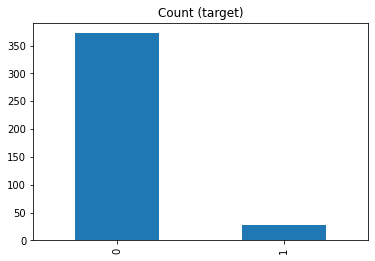

In [ ]:
target_count_split = df_train.target.value_counts()
print('Class Not Occur:', target_count_split[0])
print('Class Occur:', target_count_split[1])

target_count_split.plot(kind='bar', title='Count (target)');

Random over-sampling:
Class Not Occur: 372
Class Occur: 372


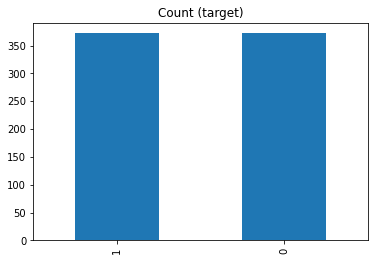

In [ ]:
# Class count
count_class_notOccur, count_class_occur = df_train.target.value_counts()

# Divide by class
df_class_notOccur = df_train[df_train['target'] == 0]
df_class_occur = df_train[df_train['target'] == 1]

df_class_occur_over = df_class_occur.sample(count_class_notOccur, replace=True)
df_train_over = pd.concat([df_class_notOccur, df_class_occur_over], axis=0)

print('Random over-sampling:')
print('Class Not Occur:', df_train_over.target.value_counts()[0])
print('Class Occur:', df_train_over.target.value_counts()[1])

df_train_over.target.value_counts().plot(kind='bar', title='Count (target)');

In [ ]:
X_train = df_train_over.drop('Desc. Parciais', axis=1)
y_train = df_train_over['Desc. Parciais']

X_test = df_test.drop('Desc. Parciais', axis=1)
y_test = df_test['Desc. Parciais']

In [ ]:
X_train

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,799961,799962,799963,799964,799965,799966,799967,799968,799969,799970,799971,799972,799973,799974,799975,799976,799977,799978,799979,799980,799981,799982,799983,799984,799985,799986,799987,799988,799989,799990,799991,799992,799993,799994,799995,799996,799997,799998,799999,target
386,22,23,22,23,23,23,23,23,23,22,22,22,22,22,22,23,23,23,23,23,23,23,23,22,22,23,22,22,23,23,23,23,23,23,22,23,22,22,22,23,...,24,23,24,24,24,23,24,24,23,24,23,23,24,23,24,23,24,24,23,24,23,23,23,24,24,23,24,24,23,24,23,23,24,23,24,24,23,24,23,0
19,-8,-9,-8,-8,-8,-8,-8,-9,-8,-8,-9,-7,-10,-8,-9,-9,-9,-9,-9,-9,-9,-10,-8,-10,-9,-10,-9,-10,-10,-10,-10,-10,-11,-10,-10,-9,-11,-10,-10,-10,...,-10,-10,-9,-11,-9,-10,-11,-10,-10,-10,-10,-10,-10,-10,-10,-9,-10,-10,-10,-11,-9,-10,-9,-9,-10,-7,-9,-8,-8,-8,-9,-7,-9,-7,-8,-7,-7,-8,-6,0
322,0,0,1,2,4,3,1,0,1,3,4,5,3,2,1,1,2,5,5,3,2,2,4,5,6,6,5,3,2,4,5,6,5,4,3,3,5,7,7,6,...,1,0,0,2,4,4,2,1,1,1,2,4,4,2,0,0,2,3,4,3,2,0,0,1,3,3,2,0,0,0,2,3,4,2,1,-1,0,2,3,0
332,-17,-16,-15,-15,-14,-14,-15,-15,-16,-16,-17,-17,-17,-16,-16,-15,-14,-14,-13,-13,-14,-15,-15,-16,-16,-17,-17,-16,-15,-15,-15,-14,-14,-15,-16,-17,-17,-17,-16,-16,...,-15,-15,-15,-15,-15,-14,-14,-14,-14,-14,-14,-14,-15,-15,-15,-15,-15,-15,-15,-15,-14,-15,-14,-15,-15,-15,-15,-15,-15,-15,-15,-15,-14,-14,-14,-14,-14,-14,-15,0
56,21,21,21,20,20,20,21,21,21,20,20,21,20,21,20,20,20,20,20,21,21,20,21,21,21,21,21,21,21,21,21,21,21,22,21,21,21,21,21,21,...,20,21,21,20,20,20,20,20,20,20,20,20,20,21,20,20,20,20,20,20,20,21,20,21,20,20,21,20,21,21,21,20,20,21,21,21,21,20,20,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
457,18,22,21,20,22,19,20,20,16,20,18,18,21,18,22,19,20,21,18,19,19,17,20,18,19,21,18,22,21,19,23,18,20,20,18,21,18,20,21,19,...,19,23,18,19,20,17,19,20,18,21,21,22,21,21,23,16,19,19,16,20,18,18,23,19,21,23,17,20,17,18,20,15,20,18,20,23,19,22,21,1
479,9,10,8,9,9,10,9,8,9,10,8,8,10,10,8,9,10,8,9,9,9,9,9,9,8,9,10,7,8,10,9,7,9,10,8,8,10,9,8,10,...,8,9,9,10,11,12,9,8,8,8,8,7,9,11,10,10,10,10,8,8,8,9,8,10,10,11,11,9,8,9,9,8,8,10,10,9,10,10,9,1
479,9,10,8,9,9,10,9,8,9,10,8,8,10,10,8,9,10,8,9,9,9,9,9,9,8,9,10,7,8,10,9,7,9,10,8,8,10,9,8,10,...,8,9,9,10,11,12,9,8,8,8,8,7,9,11,10,10,10,10,8,8,8,9,8,10,10,11,11,9,8,9,9,8,8,10,10,9,10,10,9,1
295,-13,-13,-14,-14,-13,-13,-13,-14,-13,-13,-13,-13,-13,-13,-13,-13,-13,-13,-13,-13,-13,-13,-13,-13,-12,-12,-12,-13,-13,-13,-13,-13,-13,-12,-13,-13,-13,-13,-13,-13,...,-13,-13,-13,-13,-13,-13,-13,-13,-13,-13,-13,-13,-13,-13,-13,-13,-13,-13,-13,-13,-13,-13,-13,-13,-13,-13,-13,-13,-13,-13,-13,-12,-13,-13,-13,-14,-13,-13,-13,1


# Treinamento e Teste:

In [ ]:
from xgboost import XGBClassifier

model = XGBClassifier()
model.fit(X_train, y_train)
pred_xgboost = model.predict(X_test)

# Resultados:

In [ ]:
print('Classification Report XGBoost: \n', classification_report(y_test, pred_xgboost))

Classification Report XGBoost: 
               precision    recall  f1-score   support

   not occur       1.00      1.00      1.00        94
       occur       1.00      1.00      1.00         7

    accuracy                           1.00       101
   macro avg       1.00      1.00      1.00       101
weighted avg       1.00      1.00      1.00       101



Confusion Matrix: 
 [[94  0]
 [ 0  7]]


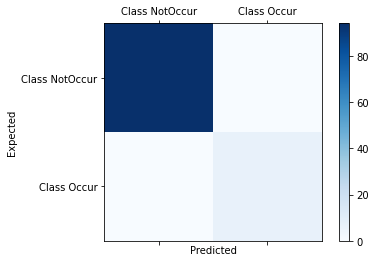

In [ ]:
conf_mat = confusion_matrix(y_test, pred_xgboost)
print('Confusion Matrix: \n', conf_mat)

labels = ['Class NotOccur', 'Class Occur']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(conf_mat, cmap=plt.cm.Blues)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()